In [1]:
# Imports
import matplotlib.pyplot as plt
import logging
import pandas as pd
# import requests
import sqlite3
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [2]:
# logging info
logging.basicConfig(level=logging.DEBUG)

dbName = "rest_server/medisch_centrum_randstad/db.sqlite3"
tableName = "rest_api_netlify"
url = "http://localhost:8080/medish_centrum_randstad/api/netlify?page=1"
csvFile = "rest_server_new/medisch_centrum_randstad/data/data.csv"

In [3]:
#dbConnection = sqlite3.connect(dbName)
#dfFromDB = pd.read_sql_query(f"SELECT * FROM {'rest_api_netlify'}", dbConnection)
# sql adds index, remove:
#df = dfFromDB.drop('id', axis=1)
#pd.set_option('display.max_columns', 10)
# print(df.head())

In [4]:
df = pd.read_csv(r"C:\Users\jiyoo\workspace\project1\df1.csv", index_col = 0)
df.head()

,genetic,length,mass,exercise,smoking,alcohol,lifespan,sugar
0,73.9,185.0,99.7,0.9,0.0,2.4,73.1,6.9
1,86.0,172.0,105.4,1.8,8.1,0.4,85.0,4.2
2,83.3,176.0,111.4,1.1,0.8,4.6,81.6,7.5
3,82.8,164.0,111.4,4.7,11.8,1.0,81.0,2.9
4,78.7,178.0,71.6,1.5,8.3,4.9,75.0,5.5


In [5]:
# remove negative values
df = df[(df >= 0).any(axis=1)]

In [6]:
df = df.drop_duplicates()

In [7]:
# convert non numeric to NaN
df = df.apply(lambda y: pd.to_numeric(y, errors='coerce') if y.dtype == 'object' else y)
df = df.apply(lambda y: pd.astype('float64') if y.dtype == 'object' else y)


In [8]:
df = df.dropna()

In [9]:
df.describe()

,genetic,length,mass,exercise,smoking,alcohol,lifespan,sugar
count,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000
mean,82.278624,183.885162,92.275930,2.403477,9.809035,2.266846,80.177693,6.487169
std,7.441333,12.622858,25.801031,1.170426,6.918614,1.801044,7.840508,2.708622
min,63.900000,154.000000,50.000000,0.100000,0.000000,0.000000,57.000000,0.700000
25%,77.600000,175.000000,71.475000,1.500000,3.375000,0.600000,75.000000,4.400000
50%,81.800000,184.000000,89.500000,2.200000,9.500000,1.700000,79.700000,6.300000
75%,86.700000,193.000000,110.825000,3.200000,15.900000,4.000000,85.200000,8.400000
max,102.200000,214.000000,163.600000,5.500000,22.200000,6.000000,105.100000,13.800000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4084 entries, 0 to 4095
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   genetic   4084 non-null   float64
 1   length    4084 non-null   float64
 2   mass      4084 non-null   float64
 3   exercise  4084 non-null   float64
 4   smoking   4084 non-null   float64
 5   alcohol   4084 non-null   float64
 6   lifespan  4084 non-null   float64
 7   sugar     4084 non-null   float64
dtypes: float64(8)
memory usage: 287.2 KB


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [12]:
train, test = train_test_split(df, test_size=0.2, random_state=42)

X = train[['genetic', 'length', 'mass', 'exercise', 'smoking', 'alcohol', 'sugar']]
y = train.lifespan

regr = LinearRegression()
regr.fit(X, y) 

score = regr.score(test[['genetic', 'length', 'mass', 'exercise', 'smoking', 'alcohol', 'sugar']],test.lifespan)
print(f'coefficient of determination(R\N{SUPERSCRIPT TWO}) vanilla:', score)
a1=score

coefficient of determination(R²) vanilla: 0.9799785196963833


DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\jiyoo\\MakeAIWork\\env\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXGeneralBol.ttf', name='STIXGeneral', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\jiyoo\\MakeAIWork\\env\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXNonUniIta.ttf', name='STIXNonUnicode', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\jiyoo\\MakeAIWork\\env\\lib\\sit

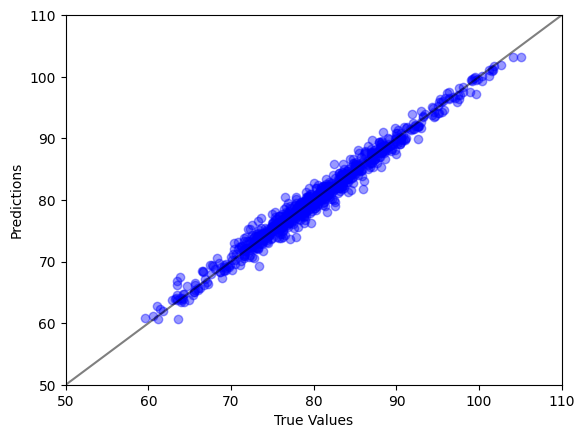

In [13]:
p_test = regr.predict(test.drop(columns=['lifespan']))

plt.scatter(test['lifespan'],p_test,c='blue', alpha=0.4)
plt.xlabel('True Values')
plt.ylabel('Predictions')

# plot diagonal line for comparison (prediction is exact)
lims=[50,110]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims,lims,c='black',alpha=0.5)
plt.show()

In [14]:
p_test

array([ 78.68643377,  68.0064549 ,  79.202257  ,  95.1511543 ,
        78.26248055,  79.81290982,  82.28895077,  82.21373723,
        72.53197426,  72.75235769,  84.78428059,  76.53914701,
        77.48319587,  79.77538028,  77.26051903,  80.15690654,
        81.71533653,  78.39117265,  77.07754342,  78.83001195,
        79.79815728, 101.04167465,  88.78855082,  99.97498515,
        80.87983707,  73.12958166,  80.50998258,  85.08602412,
        78.46410722,  78.57878104,  80.98381908,  81.40099888,
        79.98785862,  98.37242826,  80.49943526,  83.84084238,
        85.50804963,  77.67305131,  80.67237772,  88.63754025,
        81.9342558 ,  74.91841321,  66.20262401,  77.83334026,
        81.99149311,  73.65172762,  75.51529992,  89.73797096,
        78.20117851,  72.78408974,  66.08412884, 101.02155141,
        82.25446362,  82.56064394,  69.10511891,  81.19816543,
        79.902727  ,  64.10071352,  79.00902107,  93.88759626,
        75.0063266 ,  81.45903145,  85.81052762,  79.09

In [15]:
print('Mean Absolute Error:', mean_absolute_error( test['lifespan'], p_test))
print('Mean Squared Error:', mean_squared_error(test['lifespan'], p_test))
import math
print('Mean Root Squared Error:', math.sqrt(mean_squared_error(test['lifespan'], p_test)))

Mean Absolute Error: 0.8374470332070668
Mean Squared Error: 1.2398594561854268
Mean Root Squared Error: 1.1134897647421043
